## Slovenia Attack Analyze

In [33]:
import pandas as pd
import json
from IPython.display import display
import zipfile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from mplsoccer import VerticalPitch
from mplsoccer import Pitch

Read the correct Match ID -> List with all the Slovenian ID's


In [34]:
base_path = './input/wyscout'
match_id = "5414226"
file_name = match_id + '.json'

#Wyscout Match ID's from Slovenia Qualifier games
# 5414103, 5414128, 5414156, 5414180, 5414203, 5414226, 5414260, 5414284, 5414302, 5414324


In [35]:
def wyscout_json_to_df(file_name):
    match_id = file_name[:-5]
    unzip_dir = Path("./" + base_path + '/' + f"{match_id}/")

    if not unzip_dir.exists():
        unzip_dir.mkdir(parents=True, exist_ok=True)

    zip_file = f"./input/wyscout/{match_id}.zip"

    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

    with open(base_path + f"/{match_id}" + '/' + file_name, encoding='utf8') as f:
        js = json.load(f)
        df = pd.json_normalize(js['events'])
    return df

df_events = wyscout_json_to_df(file_name)

#save df to csv
if not Path("./results/wyscout/").exists():
        Path("./results/wyscout/").mkdir(parents=True, exist_ok=True)

df_events.to_csv(f"./results/wyscout/{match_id}_df_events.csv")


KeyError: 'type.primary'

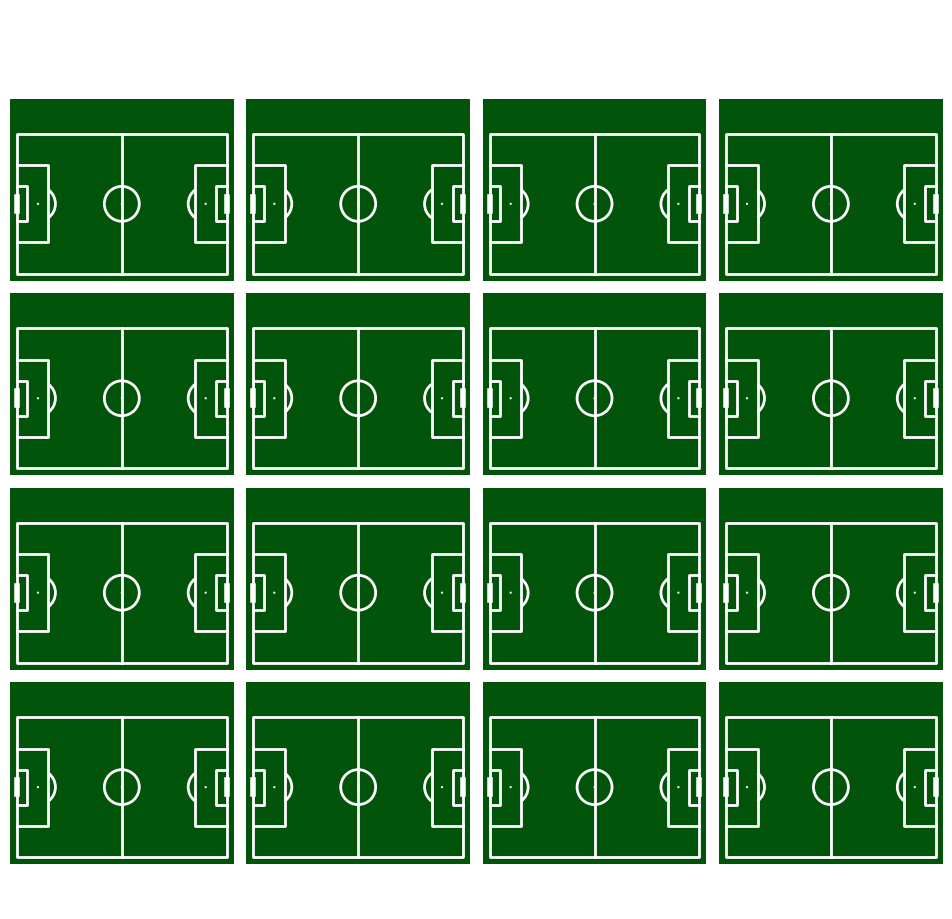

In [38]:

df_events.to_csv(f"./results/wyscout/{match_id}_df_events.csv")

df = pd.read_csv(f"./input/wyscout/{match_id}.json")  # Corrected this line

def mirror(x):
    x = 100 - x
    return x

def normalizex(x):
    x = x / 100 * 120
    return x

def normalizey(y):
    y = y / 100 * 80
    return y

pitch = Pitch(line_color='white', pitch_color='#02540b', pad_top=20)
fig, axs = pitch.grid(ncols=4, nrows=4, grid_height=0.85, title_height=0.06, axis=False, endnote_height=0.04, title_space=0.04, endnote_space=0.01)

def generatePlayerShotMap(names):
    for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
        team_filter = df[(df['type.primary'] == 'shot') & (df['player.name'] == name)]
        ax.text(60, -10, name + ":" + str(len(team_filter)) + " shots", ha='center', va='center', fontsize=14)
        for _, p in team_filter.iterrows():
            if p['matchPeriod'] == "H1":
                x = p['location.x']
                y = p['location.y']
            else:
                x = mirror(p['location.x'])
                y = mirror(p['location.y'])
            x = normalizex(x)
            y = normalizey(y)
            if p['shot.isGoal']:
                pitch.scatter(x, y, s=20, color="yellow", ax=ax)
            else:
                pitch.scatter(x, y, s=20, color="red", ax=ax)
                
    for ax in axs['pitch'][-1, 25 - len(names):]:
        ax.remove(ax)

#names = ["A. Schlager", "S. Posch", "P. Lienhart", "D. Alaba", "P. Mwene", "N. Seiwald", "X. Schlager", "K. Laimer", "C. Baumgartner", "M. Sabitzer", "M. Gregoritsch", "M. Wöber", "K. Danso", "M. Entrup", "R. Schmid", "S. Kalajdzic", "M.Seidl"]
#generatePlayerShotMap(names)
plt.show()